# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [4]:
import os
import keras
from keras.datasets import cifar10

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [5]:
train, test =cifar10.load_data()

In [6]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.np_utils.to_categorical(y, num_classes)
    return y    

In [7]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0 :
            x = keras.layers.Dense(units = n_units, activation = "relu", name = "hidden_layer"+str(i+1))(input_layer)
        else :
            x = keras.layers.Dense(units = n_units, activation = "relu", name = "hidden_layer"+str(i+1))(x)
            
    out = keras.layers.Dense(units = output_units, activation = "softmax", name = "output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs = [out])
    return model

In [10]:
## 超參數設定
Learning_rate = [0.1, 0.01, 0.001, 0.0001, 0.00001]
epochs = 50
batch_size = 256
momentum = 0.5


In [16]:
import tensorflow as tf
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in Learning_rate:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    opt = tf.keras.optimizers.Adam(lr=lr, epsilon=None, decay=0.0)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer = opt )
    
    model.fit(x_train,y_train,
             epochs=epochs,
             batch_size =batch_size,
             validation_data=(x_test,y_test),
             shuffle=True)
    # 將訓練結果儲存在 Dictionary
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


C:\Users\User\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
196/196 [==============================] - 9s 38ms/step - loss: 285.4053 - accuracy: 0.0981 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 2/50
196/196 [==============================] - 6s 32ms/step - loss: 2.3044 - accuracy: 0.0980 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 3/50
196/196 [==============================] - 6s 31ms/step - loss: 2.3044 - accuracy: 0.0997 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 4/50
196/196 [==============================] - 6s 30ms/step - loss: 2.3049 - accuracy: 0.0992 - val_loss: 2.3059 - val_accuracy: 0.1000
Epoch 5/50
196/196 [==============================] - 6s 31ms/step - loss: 2.3053 - accuracy: 0.1000 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 6/50
196/196 [==============================] - 6s 28ms/step - loss: 2.3055 - accuracy: 0.0986 - val_loss: 2.3054 - val_accuracy: 0.1000
Epoch 7/50
196/196 [==============================] - 5s 24ms/step - loss: 2.3057 - accuracy: 0.1023 - val_loss: 2.3042 - val_accuracy: 0.10

Epoch 1/50
196/196 [==============================] - 8s 33ms/step - loss: 3.3109 - accuracy: 0.2264 - val_loss: 1.9043 - val_accuracy: 0.2945
Epoch 2/50
196/196 [==============================] - 6s 31ms/step - loss: 1.8330 - accuracy: 0.3325 - val_loss: 1.7983 - val_accuracy: 0.3368
Epoch 3/50
196/196 [==============================] - 7s 33ms/step - loss: 1.7536 - accuracy: 0.3619 - val_loss: 1.6905 - val_accuracy: 0.3913
Epoch 4/50
196/196 [==============================] - 6s 32ms/step - loss: 1.7181 - accuracy: 0.3790 - val_loss: 1.6973 - val_accuracy: 0.3905
Epoch 5/50
196/196 [==============================] - 6s 31ms/step - loss: 1.6823 - accuracy: 0.3950 - val_loss: 1.6656 - val_accuracy: 0.4024
Epoch 6/50
196/196 [==============================] - 6s 32ms/step - loss: 1.6744 - accuracy: 0.3965 - val_loss: 1.6791 - val_accuracy: 0.3894
Epoch 7/50
196/196 [==============================] - 7s 34ms/step - loss: 1.6327 - accuracy: 0.4124 - val_loss: 1.6232 - val_accuracy: 0.4261

Epoch 1/50
196/196 [==============================] - 8s 35ms/step - loss: 1.9604 - accuracy: 0.2930 - val_loss: 1.8161 - val_accuracy: 0.3365
Epoch 2/50
196/196 [==============================] - 7s 35ms/step - loss: 1.7167 - accuracy: 0.3854 - val_loss: 1.6473 - val_accuracy: 0.4065
Epoch 3/50
196/196 [==============================] - 7s 35ms/step - loss: 1.6171 - accuracy: 0.4234 - val_loss: 1.5629 - val_accuracy: 0.4352
Epoch 4/50
196/196 [==============================] - 7s 34ms/step - loss: 1.5579 - accuracy: 0.4445 - val_loss: 1.5259 - val_accuracy: 0.4597
Epoch 5/50
196/196 [==============================] - 7s 33ms/step - loss: 1.5063 - accuracy: 0.4638 - val_loss: 1.4952 - val_accuracy: 0.4676
Epoch 6/50
196/196 [==============================] - 6s 32ms/step - loss: 1.4668 - accuracy: 0.4783 - val_loss: 1.4736 - val_accuracy: 0.4694
Epoch 7/50
196/196 [==============================] - 6s 32ms/step - loss: 1.4364 - accuracy: 0.4865 - val_loss: 1.4720 - val_accuracy: 0.4749

Epoch 1/50
196/196 [==============================] - 3s 16ms/step - loss: 1.9117 - accuracy: 0.3182 - val_loss: 1.7996 - val_accuracy: 0.3585
Epoch 2/50
196/196 [==============================] - 3s 15ms/step - loss: 1.7073 - accuracy: 0.3993 - val_loss: 1.6583 - val_accuracy: 0.4131
Epoch 3/50
196/196 [==============================] - 3s 15ms/step - loss: 1.6321 - accuracy: 0.4231 - val_loss: 1.5937 - val_accuracy: 0.4383
Epoch 4/50
196/196 [==============================] - 3s 15ms/step - loss: 1.5709 - accuracy: 0.4470 - val_loss: 1.5555 - val_accuracy: 0.4500
Epoch 5/50
196/196 [==============================] - 3s 15ms/step - loss: 1.5336 - accuracy: 0.4594 - val_loss: 1.5525 - val_accuracy: 0.4527
Epoch 6/50
196/196 [==============================] - 3s 15ms/step - loss: 1.4909 - accuracy: 0.4757 - val_loss: 1.5049 - val_accuracy: 0.4688
Epoch 7/50
196/196 [==============================] - 3s 15ms/step - loss: 1.4597 - accuracy: 0.4867 - val_loss: 1.4794 - val_accuracy: 0.4760

Epoch 1/50
196/196 [==============================] - 3s 16ms/step - loss: 2.1169 - accuracy: 0.2489 - val_loss: 2.0061 - val_accuracy: 0.3046
Epoch 2/50
196/196 [==============================] - 3s 16ms/step - loss: 1.9456 - accuracy: 0.3235 - val_loss: 1.8977 - val_accuracy: 0.3449
Epoch 3/50
196/196 [==============================] - 3s 16ms/step - loss: 1.8625 - accuracy: 0.3554 - val_loss: 1.8408 - val_accuracy: 0.3641
Epoch 4/50
196/196 [==============================] - 3s 16ms/step - loss: 1.8132 - accuracy: 0.3721 - val_loss: 1.7948 - val_accuracy: 0.3808
Epoch 5/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7768 - accuracy: 0.3852 - val_loss: 1.7669 - val_accuracy: 0.3919
Epoch 6/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7489 - accuracy: 0.3957 - val_loss: 1.7423 - val_accuracy: 0.3950
Epoch 7/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7247 - accuracy: 0.4006 - val_loss: 1.7183 - val_accuracy: 0.4000

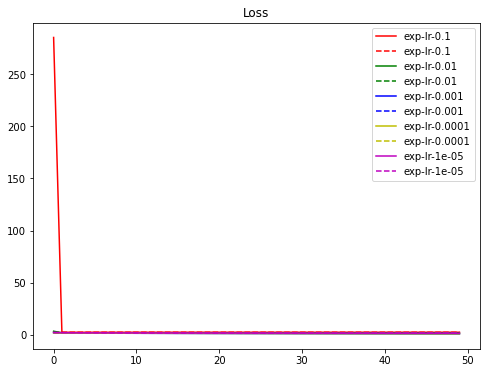

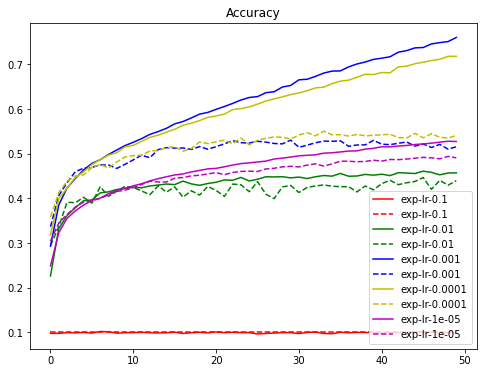

In [17]:
# 將結果畫出來
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
# RMSprop的loss不知為何是0，而Lr最佳的是1e-05的，accuracy大約可以到0.5
# Adagrad最佳的lr是0.001，在loss、Accuracy都沒有overfitting，accuracy大約可以到0.45
# Adam最佳的lr是1e-05，在loss、Accuracy都沒有overfitting，accuracy大約可以到0.51
# 總結:以此模型來說，最好的組合是優化器Adam+lr(1e-05)